In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/home/brad/DailyLog/20181207/


In [2]:
# Set up birds and block_paths
birds = ['B1083', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0.5*windt                 # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'Figure2'        # BootStrap Populations
bdfs = {}                         # Dictionary to store bdf

# Betti Parameters
analysis_id = 'BC'                # Generic lable
nperms = None                     # No permutation for each trial
ncellsperm = 33                   # Subsample 33 neurons from the population
dims = [0, 1, 2, 3]               # We want first four betti numbers
thresh = 4.0                     # Activation threshold
twin = np.linspace(0, 6000, 1000) # milliseconds

In [3]:
# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf

Data Not already binned
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-Figure2/20181110T234608Z-10.0-5.0.binned
Data Not already binned
Nreps = 20
skip = 156
dur = 206722.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206723.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206719.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206719.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206722.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206719.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206718.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206719.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206719.0
nwin

In [1]:
# Compute for all birds
betti_data = {}
for bird in birds:
    betti_data[bird] = {}
    bdf = bdfs[bird]
    block_path = bps[bird]
    
    # Compute the betti curves for the original data
    # bc
    (bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                             thresh, nperms, ncellsperm,
                                             dims, twin, windt, dtovr, shuffle=False)
    betti_data[bird]['bc'] = bc
    betti_data[bird]['t'] = t
    betti_data[bird]['t_ms'] = t_ms

    # Compute the betti curves for shuffled-in-time data
    # This breaks the inter-neuronal coordination
    # suffix: s
    (bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=True)
    betti_data[bird]['bcs'] = bcs
    betti_data[bird]['ts'] = ts
    betti_data[bird]['ts_ms'] = ts_ms

    # Compute the betti curves for shuffled-in-trials data
    # suffix: st
    (bcst, tst, tst_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=tp2.shuffle_tensor_across_trials)
    betti_data[bird]['bcst'] = bcst
    betti_data[bird]['tst'] = tst
    betti_data[bird]['tst_ms'] = tst_ms

    # Compute the betti curves for shuffled-in-trials data
    # suffix: sts
    (bcsts, tsts, tsts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=False, shuffle_across_stims=tp2.shuffle_across_trials_across_stims)
    betti_data[bird]['bcsts'] = bcsts
    betti_data[bird]['tsts'] = tsts
    betti_data[bird]['tsts_ms'] = tsts_ms

    # Compute the betti curves for shuffled-in-trials data, keeping cell spike trains intact
    # suffix: stss
    (bcstss, tstss, tstss_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=False, shuffle_across_stims=tp2.shuffle_whole_spiketrains_across_stims)
    betti_data[bird]['bcstss'] = bcstss
    betti_data[bird]['tstss'] = tstss
    betti_data[bird]['tstss_ms'] = tstss_ms

NameError: name 'birds' is not defined

In [ ]:
curve_types = {'orig': bc, 'shuff': bcs, 'shuff-st': bcst, 'shuff-sts': bcsts, 'shuff-stss':bcstss}
curve_names = {'orig': 'OriginalData', 'shuff': 'OriginalShuffle', 'shuff-st': 'ShuffleWithinStimAcrossTrials', 'shuff-sts': 'ShuffleAcrossStimAcrossTrials', 'shuff-stss': 'ShuffleAcrossStimAcrossTrials-PreserveCellSpiketrains'}

shuffle_types = ['shuff', 'shuff-st', 'shuff-sts', 'shuff-stss']


for shuffle_type in shuffle_types:

    # generate figure and axes
    plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
    figname=curve_names[shuffle_type]
    fig, axs = plt.subplots(3,4, figsize=(24, 16), sharey=False)
    axs = axs.flatten()

    bettis = [0, 1, 2, 3]              # Betti number to plot
    stims = np.array(list(bc.keys()))  # Stimuli names
    stimIDs = [1, 2, 3]                # ID numbers of stimuli to plot
    stims_to_plot = stims[stimIDs]     # names of stimuli to plot

    # Compute the mean and stderr
    bc_plot_dict = tp2.compute_mean_stderr_betti_curves(bc)     # Real curves 
    bcs_plot_dict = tp2.compute_mean_stderr_betti_curves(curve_types[shuffle_type])   # Shuffled curves 

    for betti in bettis:
        for ind, stim in enumerate(stims_to_plot):
            ax = axs[4*ind + betti]
            tpplt.plot_betti_curve(bc_plot_dict, t_ms, stim, betti, ax)
            tpplt.plot_betti_curve(bcs_plot_dict, t_ms, stim, betti, ax)

    #plt.savefig(os.path.join(figsavepth, '{}_P03S03_BettiCurveWithShuffled_betti{}_{}_alltogether.eps'.format(bird,betti, thresh)))
    plt.savefig(os.path.join(figsavepth, '{}_{}_{}.eps'.format(bird,figname, thresh)))

In [ ]:
# All birds, All Stims, All shuffles, individually

curve_types = {'orig': bc, 'shuff': bcs, 'shuff-st': bcst, 'shuff-sts': bcsts, 'shuff-stss':bcstss}
curve_names = {'orig': 'OriginalData', 'bcs': 'OriginalShuffle', 'bcst': 'ShuffleWithinStimAcrossTrials', 'bcsts': 'ShuffleAcrossStimAcrossTrials', 'bcstss': 'ShuffleAcrossStimAcrossTrials-PreserveCellSpiketrains'}

shuffle_types = ['bcs', 'bcst', 'bcsts', 'bcstss']

for bird in birds:
    bird_betti_data = betti_data[bird]
    for shuffle_suffix in shuffle_types:

        # generate figure and axes
        plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
        figname=curve_names[shuffle_suffix]
        fig, axs = plt.subplots(4, 8, figsize=(32, 16), sharey=False)
        axs = axs.flatten()
        
        # Compute the mean and stderr
        bc = bird_betti_data['bc']
        bcs = bird_betti_data[shuffle_suffix]
        bc_plot_dict = tp2.compute_mean_stderr_betti_curves(bc)     # Real curves 
        bcs_plot_dict = tp2.compute_mean_stderr_betti_curves(bcs)   # Shuffled curves 

        bettis = [0, 1, 2, 3]              # Betti number to plot
        stims = np.array(list(bc.keys()))  # Stimuli names
        stimIDs = range(8)                 # ID numbers of stimuli to plot
        stims_to_plot = stims[stimIDs]     # names of stimuli to plot
#         print('Bird stims: {}'.format(stims))
#         print('Plotting stims: {}'.format(stims_to_plot))

        t_ms = bird_betti_data['t_ms']
        for betti in bettis:
            for ind, stim in enumerate(stims_to_plot):
                ax = axs[len(stimIDs)*betti + ind]
                tpplt.plot_betti_curve(bc_plot_dict, t_ms, stim, betti, ax)
                tpplt.plot_betti_curve(bcs_plot_dict, t_ms, stim, betti, ax)
        plt.savefig(os.path.join(figsavepth, '{}_{}_{}_allstim.pdf'.format(bird,figname, thresh)))

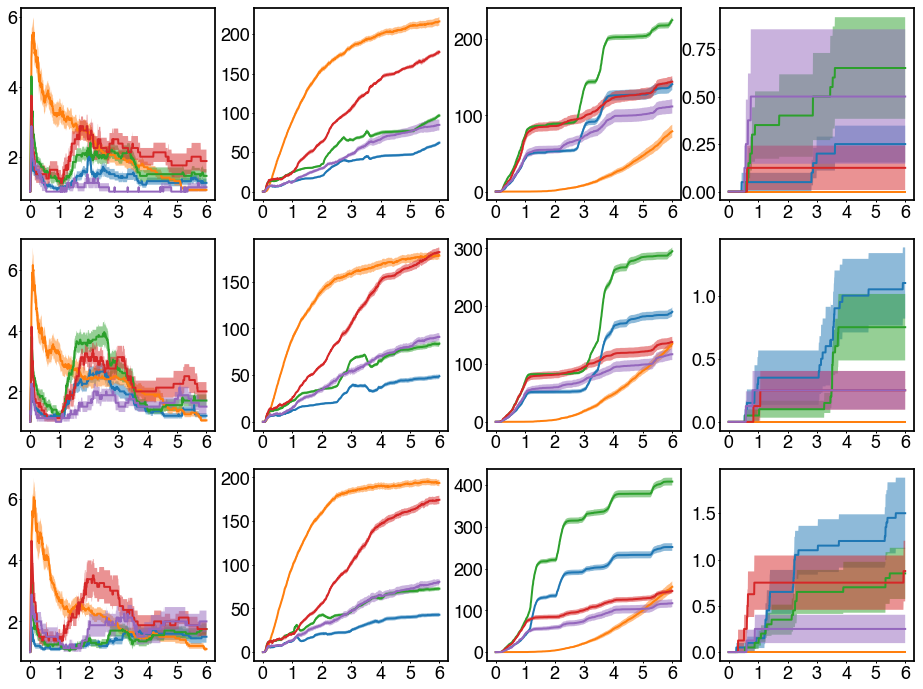

In [5]:
# All the shuffles on the same plot, for 3 stimuli from single bird

curve_types = {'orig': bc, 'shuff': bcs, 'shuff-st': bcst, 'shuff-sts': bcsts, 'shuff-stss':bcstss}
curve_names = {'orig': 'OriginalData', 'bcs': 'OriginalShuffle', 'bcst': 'ShuffleWithinStimAcrossTrials', 'bcsts': 'ShuffleAcrossStimAcrossTrials', 'bcstss': 'ShuffleAcrossStimAcrossTrials-PreserveCellSpiketrains'}

shuffle_types = ['bcs', 'bcst', 'bcsts', 'bcstss']
                 #orange  #green  #red    #purple
bird = 'B1083'

bird_betti_data = betti_data[bird]
    # generate figure and axes
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
fig, axs = plt.subplots(3, 4, figsize=(16, 12), sharey=False)
axs = axs.flatten()
bc = bird_betti_data['bc']
bettis = [0, 1, 2, 3]              # Betti number to plot
stims = np.array(list(bc.keys()))  # Stimuli names
stimIDs = [1,2,3]                # ID numbers of stimuli to plot
stims_to_plot = stims[stimIDs]     # names of stimuli to plot
bc_plot_dict = tp2.compute_mean_stderr_betti_curves(bc) 
t_ms = bird_betti_data['t_ms']
for betti in bettis:
    for ind, stim in enumerate(stims_to_plot):
        ax = axs[len(bettis)*ind + betti]
        tpplt.plot_betti_curve(bc_plot_dict, t_ms, stim, betti, ax)
for shuffle_suffix in shuffle_types:  
    bcs = bird_betti_data[shuffle_suffix]
    bcs_plot_dict = tp2.compute_mean_stderr_betti_curves(bcs)   # Shuffled curves 
    for betti in bettis:
        for ind, stim in enumerate(stims_to_plot):
            ax = axs[4*ind + betti]
            tpplt.plot_betti_curve(bcs_plot_dict, t_ms, stim, betti, ax)
plt.savefig(os.path.join(figsavepth, '{}_{}_3stim_allshuff.pdf'.format(bird, thresh)))

In [ ]:
# All birds, All Stims, All shuffles, on same plot

curve_types = {'orig': bc, 'shuff': bcs, 'shuff-st': bcst, 'shuff-sts': bcsts, 'shuff-stss':bcstss}
curve_names = {'orig': 'OriginalData', 'bcs': 'OriginalShuffle', 'bcst': 'ShuffleWithinStimAcrossTrials', 'bcsts': 'ShuffleAcrossStimAcrossTrials', 'bcstss': 'ShuffleAcrossStimAcrossTrials-PreserveCellSpiketrains'}

shuffle_types = ['bcs', 'bcst', 'bcsts', 'bcstss']

for bird in birds:
    bird_betti_data = betti_data[bird]
        # generate figure and axes
    plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
    fig, axs = plt.subplots(4, 8, figsize=(32, 16), sharey=False)
    axs = axs.flatten()
    bc = bird_betti_data['bc']
    bettis = [0, 1, 2, 3]              # Betti number to plot
    stims = np.array(list(bc.keys()))  # Stimuli names
    stimIDs = range(8)                 # ID numbers of stimuli to plot
    stims_to_plot = stims[stimIDs]     # names of stimuli to plot
    bc_plot_dict = tp2.compute_mean_stderr_betti_curves(bc) 
    t_ms = bird_betti_data['t_ms']
    for betti in bettis:
        for ind, stim in enumerate(stims_to_plot):
            ax = axs[len(stimIDs)*betti + ind]
            tpplt.plot_betti_curve(bc_plot_dict, t_ms, stim, betti, ax)
    for shuffle_suffix in shuffle_types:  
        bcs = bird_betti_data[shuffle_suffix]
        bcs_plot_dict = tp2.compute_mean_stderr_betti_curves(bcs)   # Shuffled curves 
        for betti in bettis:
            for ind, stim in enumerate(stims_to_plot):
                ax = axs[len(stimIDs)*betti + ind]

                tpplt.plot_betti_curve(bcs_plot_dict, t_ms, stim, betti, ax)
        plt.savefig(os.path.join(figsavepth, '{}_{}_allstim_allshuff.pdf'.format(bird, thresh)))

In [8]:
bc['I_40k'].shape

(4, 1000, 20)